In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [43]:
data_path = "Social_Network_Ads.csv"
DATA = pd.read_csv(data_path)
DATA.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
DATA["Gender"] = le.fit_transform(DATA["Gender"])

In [46]:
DATA["Gender"].value_counts()
DATA

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


In [47]:
DATA["Age Category"] = ["iGen" if 0 < age < 25 else "Milennials" if 24 < age < 40 else "GenX" if 29 < age < 56 
                        else "Babyboomers" if 55 < age < 74 else None \
                       for age in list(DATA["Age"].values)]

In [48]:
DATA.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category
0,15624510,1,19,19000,0,iGen
1,15810944,1,35,20000,0,Milennials
2,15668575,0,26,43000,0,Milennials
3,15603246,0,27,57000,0,Milennials
4,15804002,1,19,76000,0,iGen


In [49]:
DATA["Age Category"] = le.fit_transform(DATA["Age Category"])
DATA["Age Category"].value_counts()
DATA.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category
0,15624510,1,19,19000,0,3
1,15810944,1,35,20000,0,2
2,15668575,0,26,43000,0,2
3,15603246,0,27,57000,0,2
4,15804002,1,19,76000,0,3


In [50]:
DATA["Income Category"] = pd.qcut(DATA["EstimatedSalary"], 3, labels = ["Low", "Medium", "High"])
DATA.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category,Income Category
0,15624510,1,19,19000,0,3,Low
1,15810944,1,35,20000,0,2,Low
2,15668575,0,26,43000,0,2,Low
3,15603246,0,27,57000,0,2,Medium
4,15804002,1,19,76000,0,3,Medium


In [51]:
DATA["Income Category"] = le.fit_transform(DATA["Income Category"])
DATA.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category,Income Category
0,15624510,1,19,19000,0,3,1
1,15810944,1,35,20000,0,2,1
2,15668575,0,26,43000,0,2,1
3,15603246,0,27,57000,0,2,2
4,15804002,1,19,76000,0,3,2


In [52]:
DATA.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Age Category', 'Income Category'],
      dtype='object')

In [53]:
X = DATA[["Age Category", "Income Category"]]
Y = DATA["Purchased"]

In [54]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
User ID            400 non-null int64
Gender             400 non-null int32
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
Age Category       400 non-null int32
Income Category    400 non-null int32
dtypes: int32(3), int64(4)
memory usage: 17.2 KB


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# ASSIGNMENT: Train the model with Age Category and Income Category           
# as features
# 1) MODEL: NAIVE BAYES

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
Y_pred = classifier.predict(X_test)

In [58]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8833333333333333
Precision: 0.9024390243902439
Recall: 0.7872340425531915


In [59]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_test, Y_pred)
roc_auc = auc (fpr, tpr)
print("ROC AUC", roc_auc)

ROC AUC 0.8662197610026231


In [38]:
def conftable(test, pred, imagename):
    confmatrix = metrics.confusion_matrix(Y_test, Y_pred)
    plt.matshow(confmatrix)
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.ylabel("GroundTruth")
    plt.xlabel("Predicted")
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

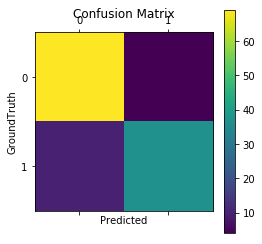

[[69  4]
 [10 37]]


In [60]:
conftable(Y_test, Y_pred, "conf")

In [61]:
#Gound Truth
pd.Series(Y_test).value_counts()

0    73
1    47
Name: Purchased, dtype: int64

# 2) MODEL: LOGISTIC REGRESSION

In [63]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

C:\Users\TheForbesMaterial\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
Y_pred = classifier.predict(X_test)

Accuracy:  0.8833333333333333
Precision:  0.9024390243902439
Recall:  0.7872340425531915
ROC AUC 0.8662197610026231


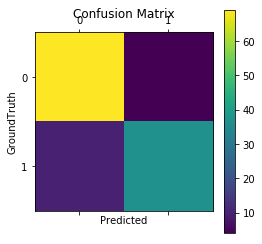

[[69  4]
 [10 37]]


In [65]:
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
print("Precision: ", metrics.precision_score(Y_test, Y_pred))
print("Recall: ", metrics.recall_score(Y_test, Y_pred))
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC", roc_auc)
conftable(Y_test, Y_pred, "conf")

# 3) MODEL: RANDOM FOREST

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [67]:
Y_pred = classifier.predict(X_test)

Accuracy:  0.8916666666666667
Precison:  0.8035714285714286
Recall: 0.9574468085106383
ROC AUC:  0.9033809385018946


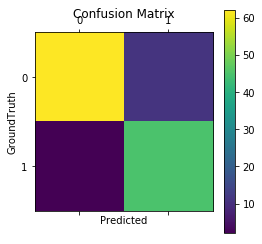

[[62 11]
 [ 2 45]]


In [68]:
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
print("Precison: ", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC: ", roc_auc)
conftable(Y_test, Y_pred, "conf")

In [2]:
pip install "xgboost"

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement xgboost (from versions: none)
ERROR: No matching distribution found for xgboost


In [3]:
import xgboost as xgb
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgboost.fit(X_train, Y_train)
Y_pred = xgboost.predict(x_test)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
print("Precision: ", metrics.precision_score(Y_test, Y_pred))
print("Recall: ", metrics.recall_score(Y_test, Y_pred))
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC", roc_auc)
conftable(Y_test, Y_pred, "conf")